In [42]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Reading data in dataframe

srps_hsng_df = pd.read_csv('train.csv')

srps_hsng_df.shape

(1460, 81)

In [44]:
srps_hsng_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [45]:
srps_hsng_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [46]:
srps_hsng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Null value treatment

We have NA in many columns but that does not represent missing data. If we refer to the provided Data dictionary, the NA means "unavailability" of the parent/main feature in the property. For example, if there is no basement in a house, the corresponding columns such as 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' for that house/row has value set to NA.

We need to first update these column values.

In [47]:
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' have NA there is 'No Basement'. 
# We can replace it with more meaning value to avoid any confusion

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    srps_hsng_df[col].fillna('No Basement', inplace=True)

In [48]:
srps_hsng_df['BsmtQual'].fillna('No Basement', inplace=True)
srps_hsng_df['BsmtCond'].fillna('No Basement', inplace=True)
srps_hsng_df['BsmtExposure'].fillna('No Basement', inplace=True)
srps_hsng_df['BsmtFinType1'].fillna('No Basement', inplace=True)
srps_hsng_df['BsmtFinType2'].fillna('No Basement', inplace=True)

In [49]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    srps_hsng_df[col].fillna('No Garage', inplace=True)    
    
# GarageYrBlt can be set to 0 if there is no garage
srps_hsng_df['GarageYrBlt'].fillna(0, inplace=True)

In [50]:
srps_hsng_df.MasVnrType.fillna('No Masonry', inplace=True)

In [51]:
srps_hsng_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [52]:
#percentage of null values (non zero) in differend columns
cols = list(srps_hsng_df)
nullValues = []
for i in srps_hsng_df.isnull().sum()*100/srps_hsng_df.shape[0]:
    nullValues.append(i)
data = {'Features': cols, 'NullCount': nullValues}
null_df = pd.DataFrame(data)
null_df[null_df['NullCount'] != 0].sort_values(by='NullCount', ascending = False)

Features  NullCount
72       PoolQC  99.520548
74  MiscFeature  96.301370
6         Alley  93.767123
73        Fence  80.753425
3   LotFrontage  17.739726
26   MasVnrArea   0.547945
42   Electrical   0.068493

From the above we can see that there are few columns with lots of null values, e.g. Alley, PoolQC, MiscFeature, Fence. Similarly Id column can be dropped.

We can drop them in first round.

In [53]:
srps_hsng_df = srps_hsng_df.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1)


We can see that unique values are not present

In [54]:
srps_hsng_df.shape

(1460, 76)

## Derived Data

In [55]:
#Getting the age of the houses
srps_hsng_df['CurrentYear'] = datetime.datetime.now().year
srps_hsng_df["HouseAge"] = srps_hsng_df['CurrentYear'] - srps_hsng_df['YearBuilt']
srps_hsng_df.drop(['CurrentYear', 'YearBuilt', 'YrSold'], axis = 1, inplace = True)

In [56]:
srps_hsng_df.shape

(1460, 75)

In [57]:
## Convert three columns to 'object' type as per the data dictionary

srps_hsng_df[['MSSubClass', 'OverallQual', 'OverallCond']] = srps_hsng_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

There are large number of numeric and categorical features. We can analyze them conveniently if we separate them out. So let's first do that.

In [58]:
numeric_cols_df = srps_hsng_df.select_dtypes(include=['int64', 'float64'])
cat_cols_df = srps_hsng_df.select_dtypes(include=['object'])

In [59]:
numeric_cols_df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  WoodDeckSF  OpenPorchSF  \
0        150          856       856       854  ...           0           61   
1        284         1262      1262         0  ...         298            0   
2        434          920       920       866  ...           0           42   
3        540          756       961       756  ...           0           35   
4        490         1145      1145      1053  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  HouseAge  
0     208500        21  
1     181500        48  
2     223500        23  
3     140000       109  
4     250000        24  

[5 rows x 33 columns]

In [60]:
numeric_cols_df.shape

(1460, 33)

In [61]:
cat_cols_df.shape

(1460, 42)

### Outlier Treatment

In [62]:
def drawBoxPlot (plt_cnt, data_df):
    cols = []
    num_plot_rows = int(data_df.columns.size / plt_cnt) + 1
    plot_index = 1
    plt.figure(figsize=(20, 6 * num_plot_rows))
    for i in range(0, data_df.columns.size):
        if(len(cols) < plt_cnt):
            cols.append(data_df.columns[i])
        if(len(cols) == plt_cnt or i == data_df.columns.size - 1):
            for num_col in cols:
                plt.subplot(num_plot_rows, plt_cnt, plot_index)
                sns.boxplot(y=num_col, data=data_df)
                plot_index += 1
            cols = []

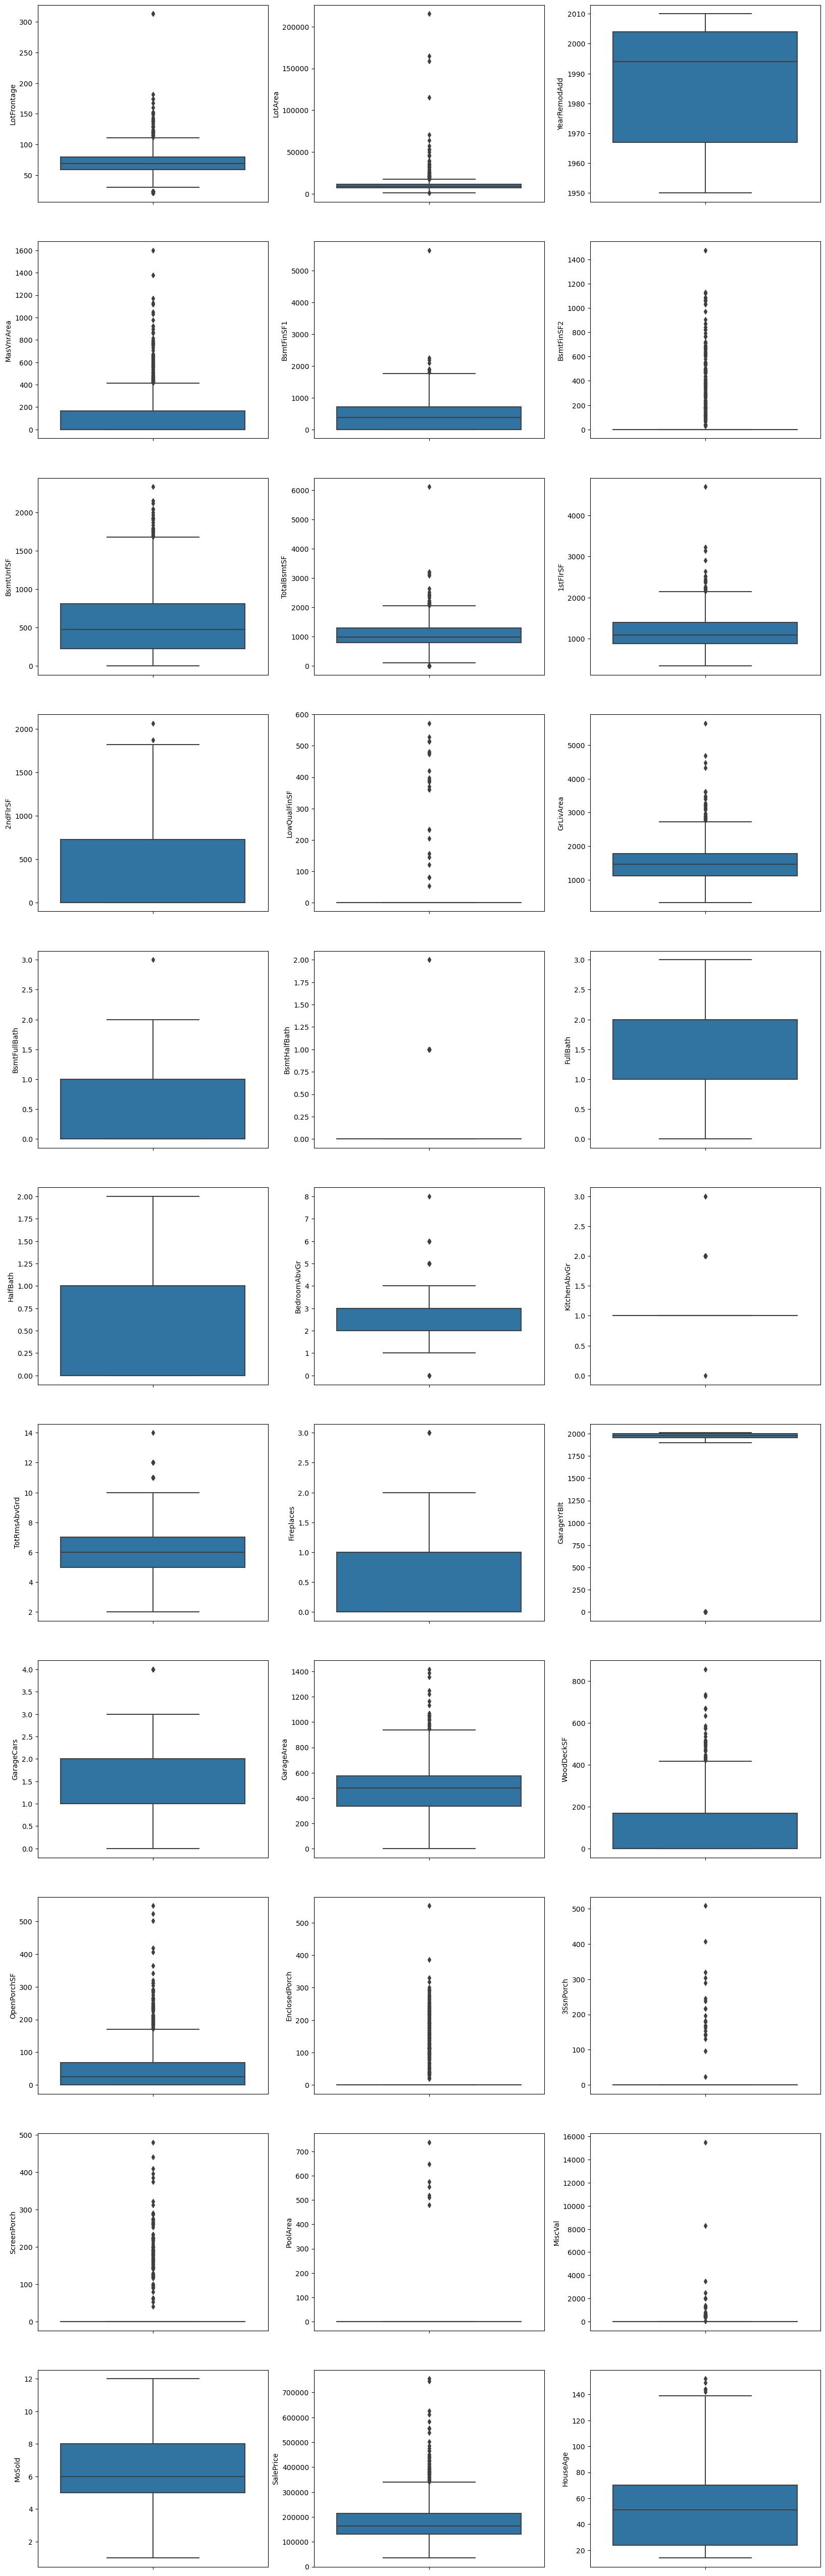

In [63]:
drawBoxPlot(3, numeric_cols_df)

There are outliers in multiple columns. We need to fix the values, but before that it is good if we can find out the outlier percentage for each column. For this calculation we are using 25 percentile and 75 percentile as boundaries.

In [64]:
def calculateOutlierPercentage(data_df):
    for col in data_df.columns:
        IQR = data_df[col].quantile(.75) - data_df[col].quantile(.25)
        outlierCount = data_df[(data_df[col] > (data_df[col].quantile(.75)+1.5*IQR)) | (data_df[col]<(data_df[col].quantile(.25)-1.5*IQR))].shape[0]
        outlierPercentage[col]=round(outlierCount/data_df.shape[0]*100,2)
    
    outlier_df=pd.DataFrame({'Columns':list(outlierPercentage.keys()),'OutlierPercentage':list(outlierPercentage.values())})
    return outlier_df.sort_values(by="OutlierPercentage", ascending=False)

In [65]:
outlierPercentage = {}
calculateOutlierPercentage(numeric_cols_df)

Columns  OutlierPercentage
25  EnclosedPorch              14.25
5      BsmtFinSF2              11.44
27    ScreenPorch               7.95
3      MasVnrArea               6.58
0     LotFrontage               6.03
13   BsmtHalfBath               5.62
20    GarageYrBlt               5.55
24    OpenPorchSF               5.27
1         LotArea               4.73
17   KitchenAbvGr               4.66
31      SalePrice               4.18
7     TotalBsmtSF               4.18
29        MiscVal               3.56
16   BedroomAbvGr               2.40
23     WoodDeckSF               2.19
11      GrLivArea               2.12
18   TotRmsAbvGrd               2.05
6       BsmtUnfSF               1.99
10   LowQualFinSF               1.78
26      3SsnPorch               1.64
22     GarageArea               1.44
8        1stFlrSF               1.37
4      BsmtFinSF1               0.48
28       PoolArea               0.48
32       HouseAge               0.48
21     GarageCars               0.34
19     Fireplaces               0.34
9        2ndFlrSF               0.14
12   BsmtFullBath               0.07
15       HalfBath               0.00
30         MoSold               0.00
2    YearRemodAdd               0.00
14       FullBath               0.00

Dropping outlier values is not a good idea as it will lead to loss of information. We need to do rationalization of values.

In [66]:
for Columns,OutlierPercentage in outlierPercentage.items():
    if Columns!='SalePrice':
        IQR = srps_hsng_df[Columns].quantile(.75) - srps_hsng_df[Columns].quantile(.25) 
        max_value = srps_hsng_df[Columns].quantile(.75)+1.5*IQR
        min_value = srps_hsng_df[Columns].quantile(.25)-1.5*IQR
        srps_hsng_df[Columns][srps_hsng_df[Columns] > max_value] = max_value
        srps_hsng_df[Columns][srps_hsng_df[Columns] < min_value ] = min_value

Let's check outlier status after the above step. For that we will need to re-query and fill numeric_cols_df

In [67]:
numeric_cols_df = srps_hsng_df.select_dtypes(include=['int64', 'float64'])
numeric_cols_df.shape

(1460, 33)

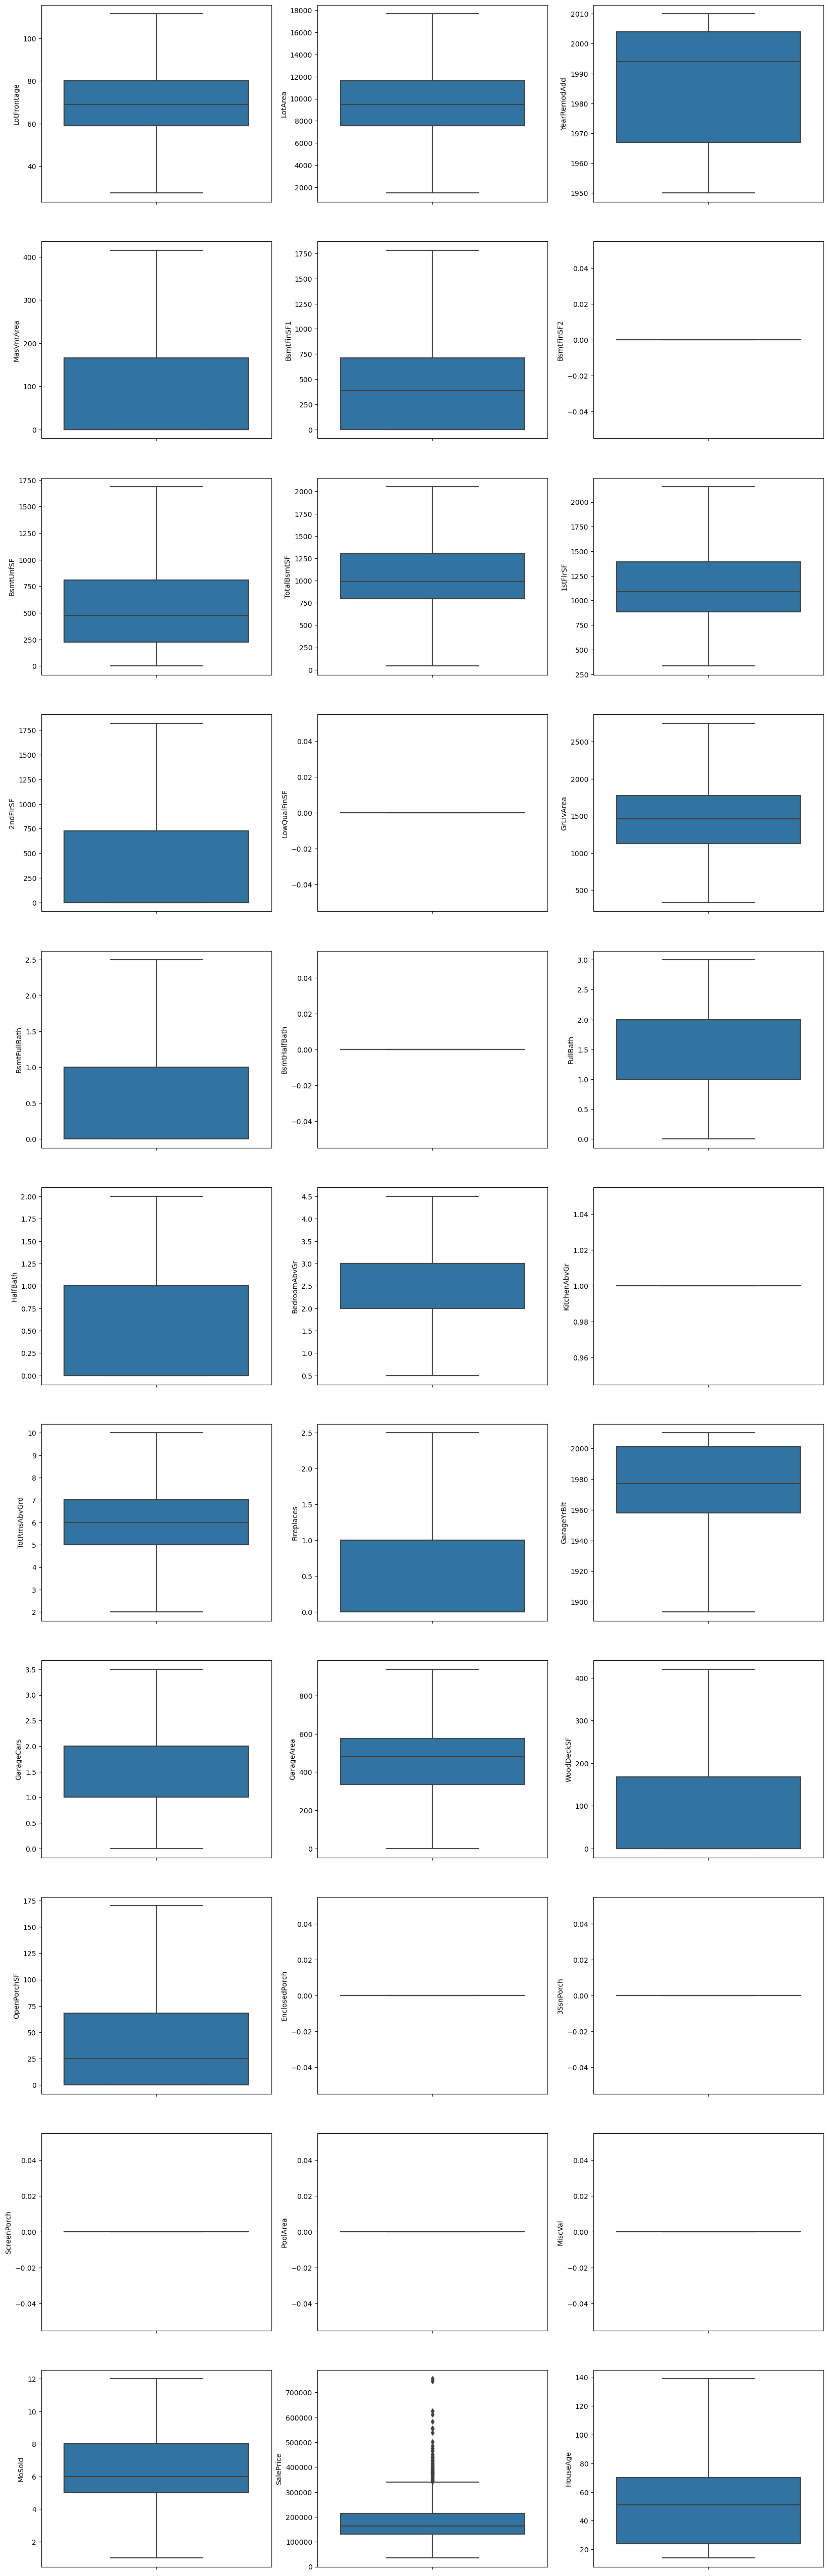

In [68]:
drawBoxPlot(3, numeric_cols_df)

In [69]:
# As can be seen in above plots, after the outlier treatment, for some features there are not many unique values

for col in ['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 
            'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch']:
    print(srps_hsng_df[col].value_counts())

3SsnPorch
0    1460
Name: count, dtype: int64
ScreenPorch
0    1460
Name: count, dtype: int64
PoolArea
0    1460
Name: count, dtype: int64
MiscVal
0    1460
Name: count, dtype: int64
BsmtFinSF2
0    1460
Name: count, dtype: int64
LowQualFinSF
0    1460
Name: count, dtype: int64
BsmtHalfBath
0    1460
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64
EnclosedPorch
0    1460
Name: count, dtype: int64


In [70]:
# Above output confirms the same. Hence we can drop them

# Looking at unique values for columns 

srps_hsng_df.drop(['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 
                   'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch'], axis = 1, inplace = True)

In [71]:
numeric_cols_df = srps_hsng_df.select_dtypes(include=['int64', 'float64'])

(1460, 24)

In [72]:
outlierPercentage = {}
calculateOutlierPercentage(numeric_cols_df)

Columns  OutlierPercentage
22     SalePrice               4.18
0    LotFrontage               0.00
1        LotArea               0.00
21        MoSold               0.00
20   OpenPorchSF               0.00
19    WoodDeckSF               0.00
18    GarageArea               0.00
17    GarageCars               0.00
16   GarageYrBlt               0.00
15    Fireplaces               0.00
14  TotRmsAbvGrd               0.00
13  BedroomAbvGr               0.00
12      HalfBath               0.00
11      FullBath               0.00
10  BsmtFullBath               0.00
9      GrLivArea               0.00
8       2ndFlrSF               0.00
7       1stFlrSF               0.00
6    TotalBsmtSF               0.00
5      BsmtUnfSF               0.00
4     BsmtFinSF1               0.00
3     MasVnrArea               0.00
2   YearRemodAdd               0.00
23      HouseAge               0.00

In [73]:
srps_hsng_df.shape

(1460, 66)

In [74]:
numeric_cols_df.shape

(1460, 24)

## Exploratory Data Analysis

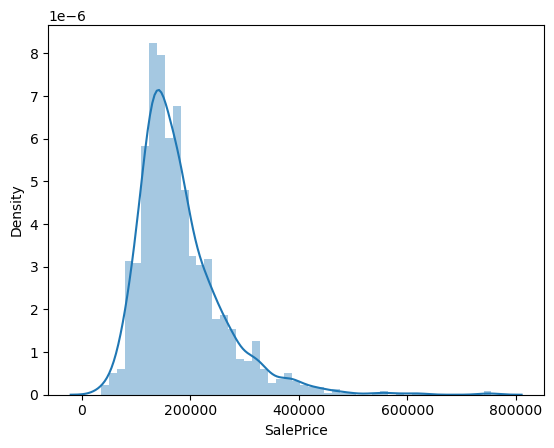

In [75]:
plt.figure()
sns.distplot(srps_hsng_df['SalePrice'])
plt.show()

Clearly the SalePrice is skewed.

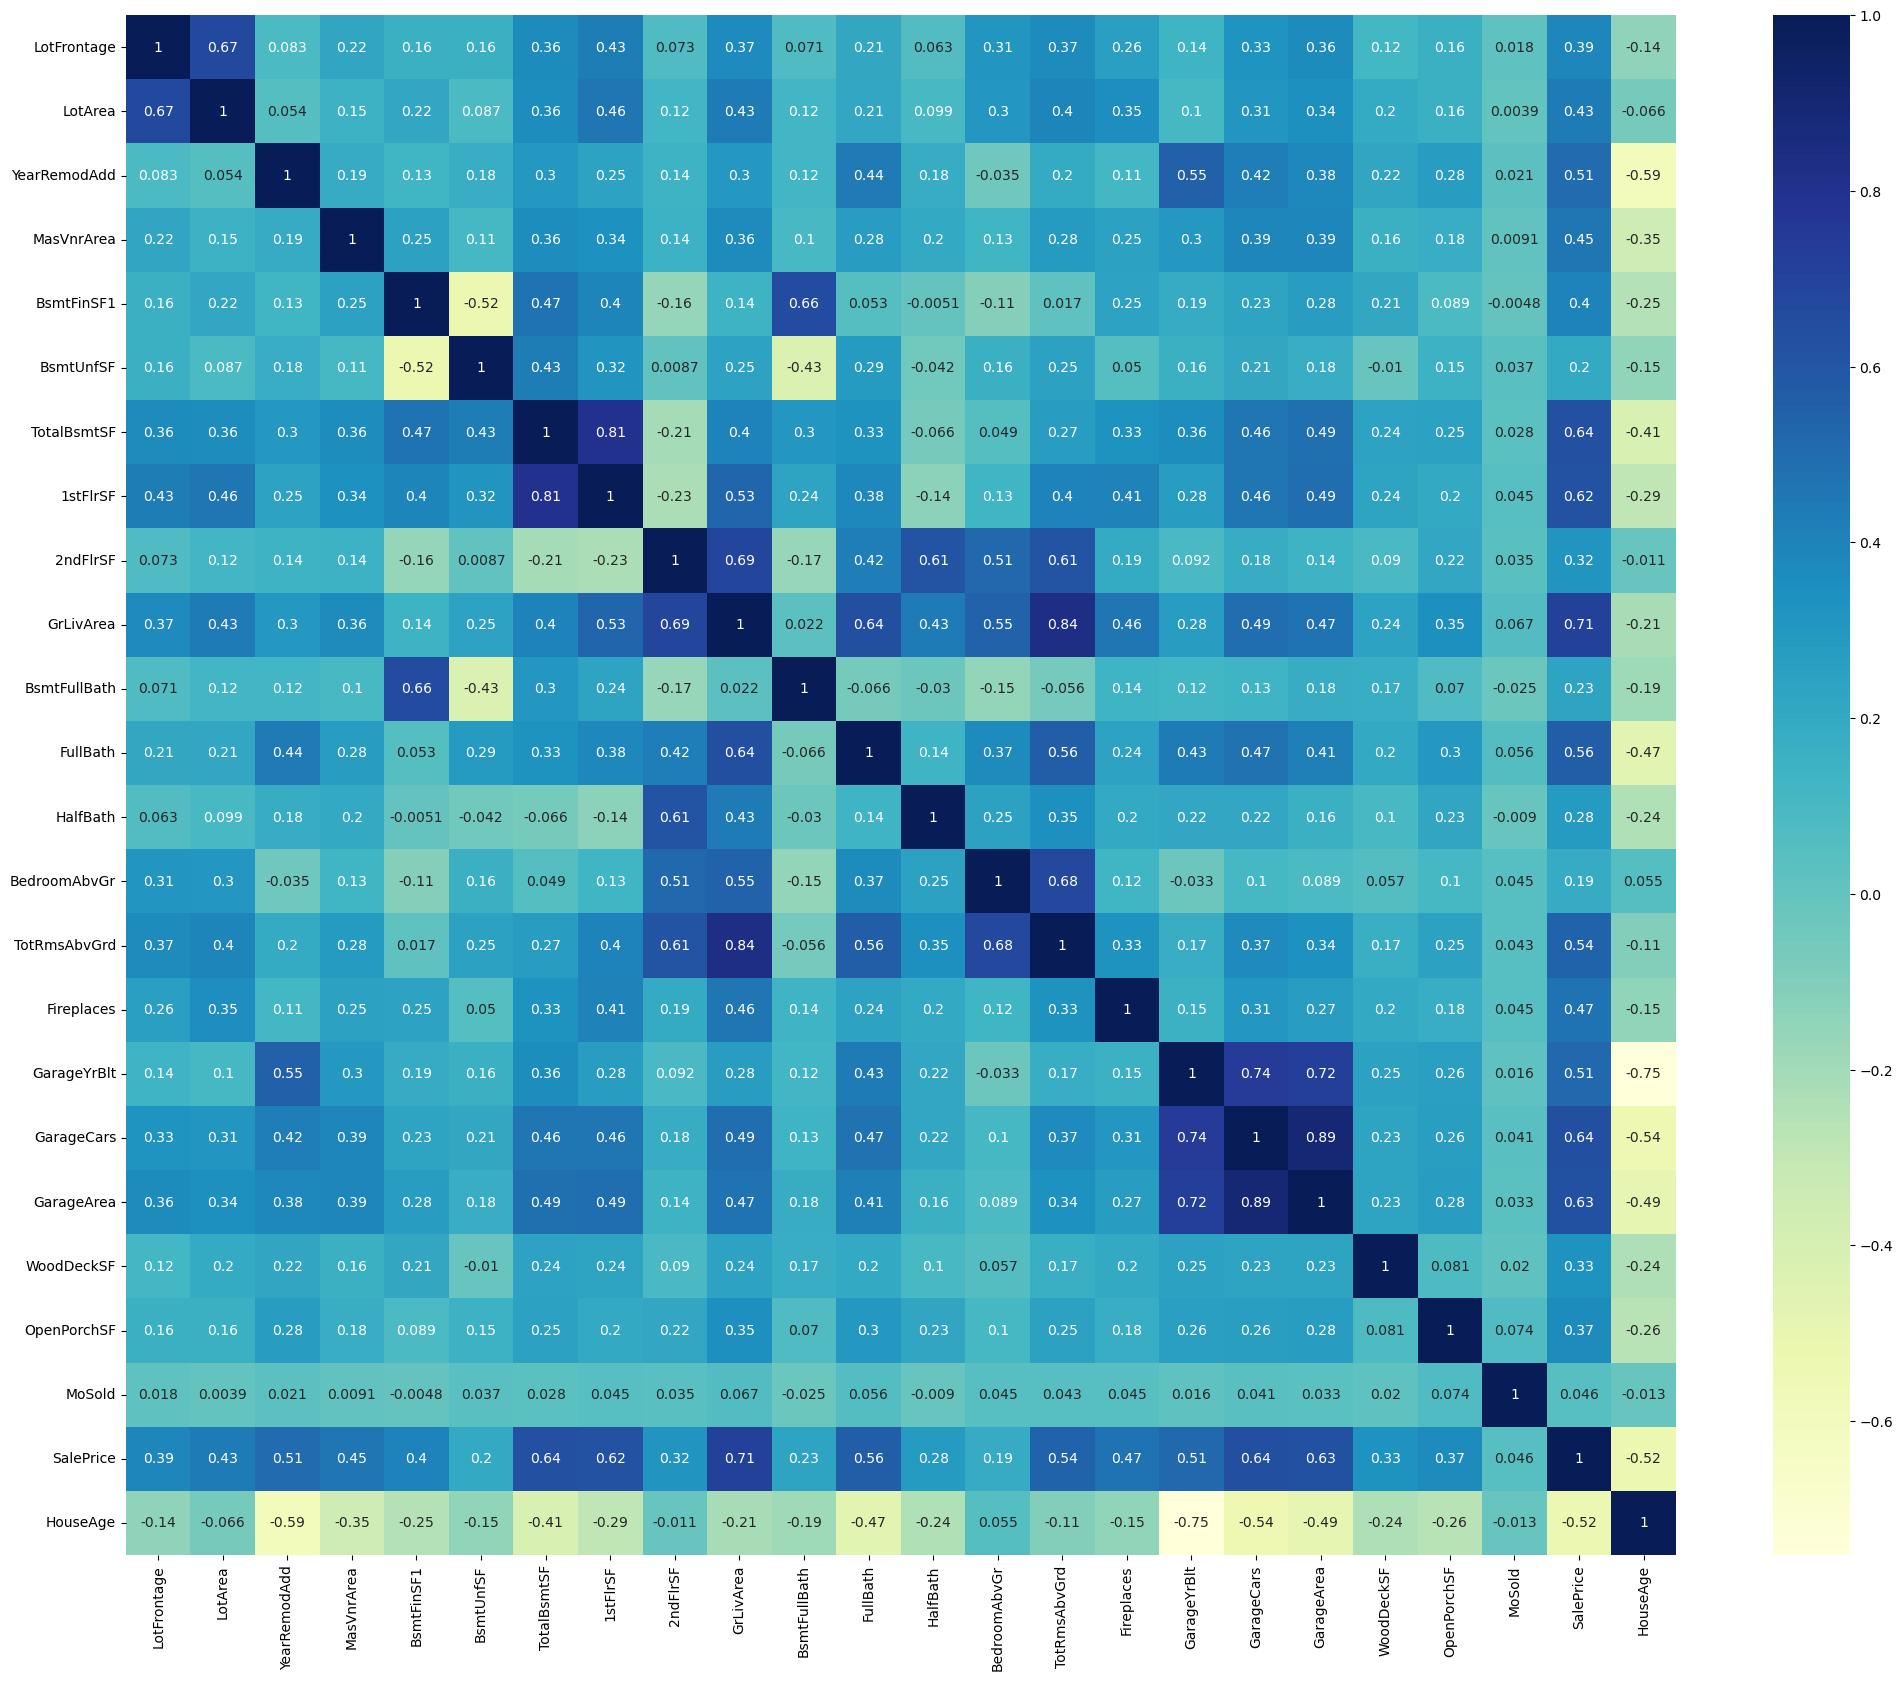

In [76]:
# Visualizing correlation among numeric columns

plt.figure(figsize = (25,20))
sns.heatmap(numeric_cols_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [109]:
continuous_value_cols = ['LotFrontage', 'LotArea',  'BsmtFinSF1', 'BsmtUnfSF', 
                             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageCars', 'GarageArea']

<Figure size 2400x1200 with 0 Axes>

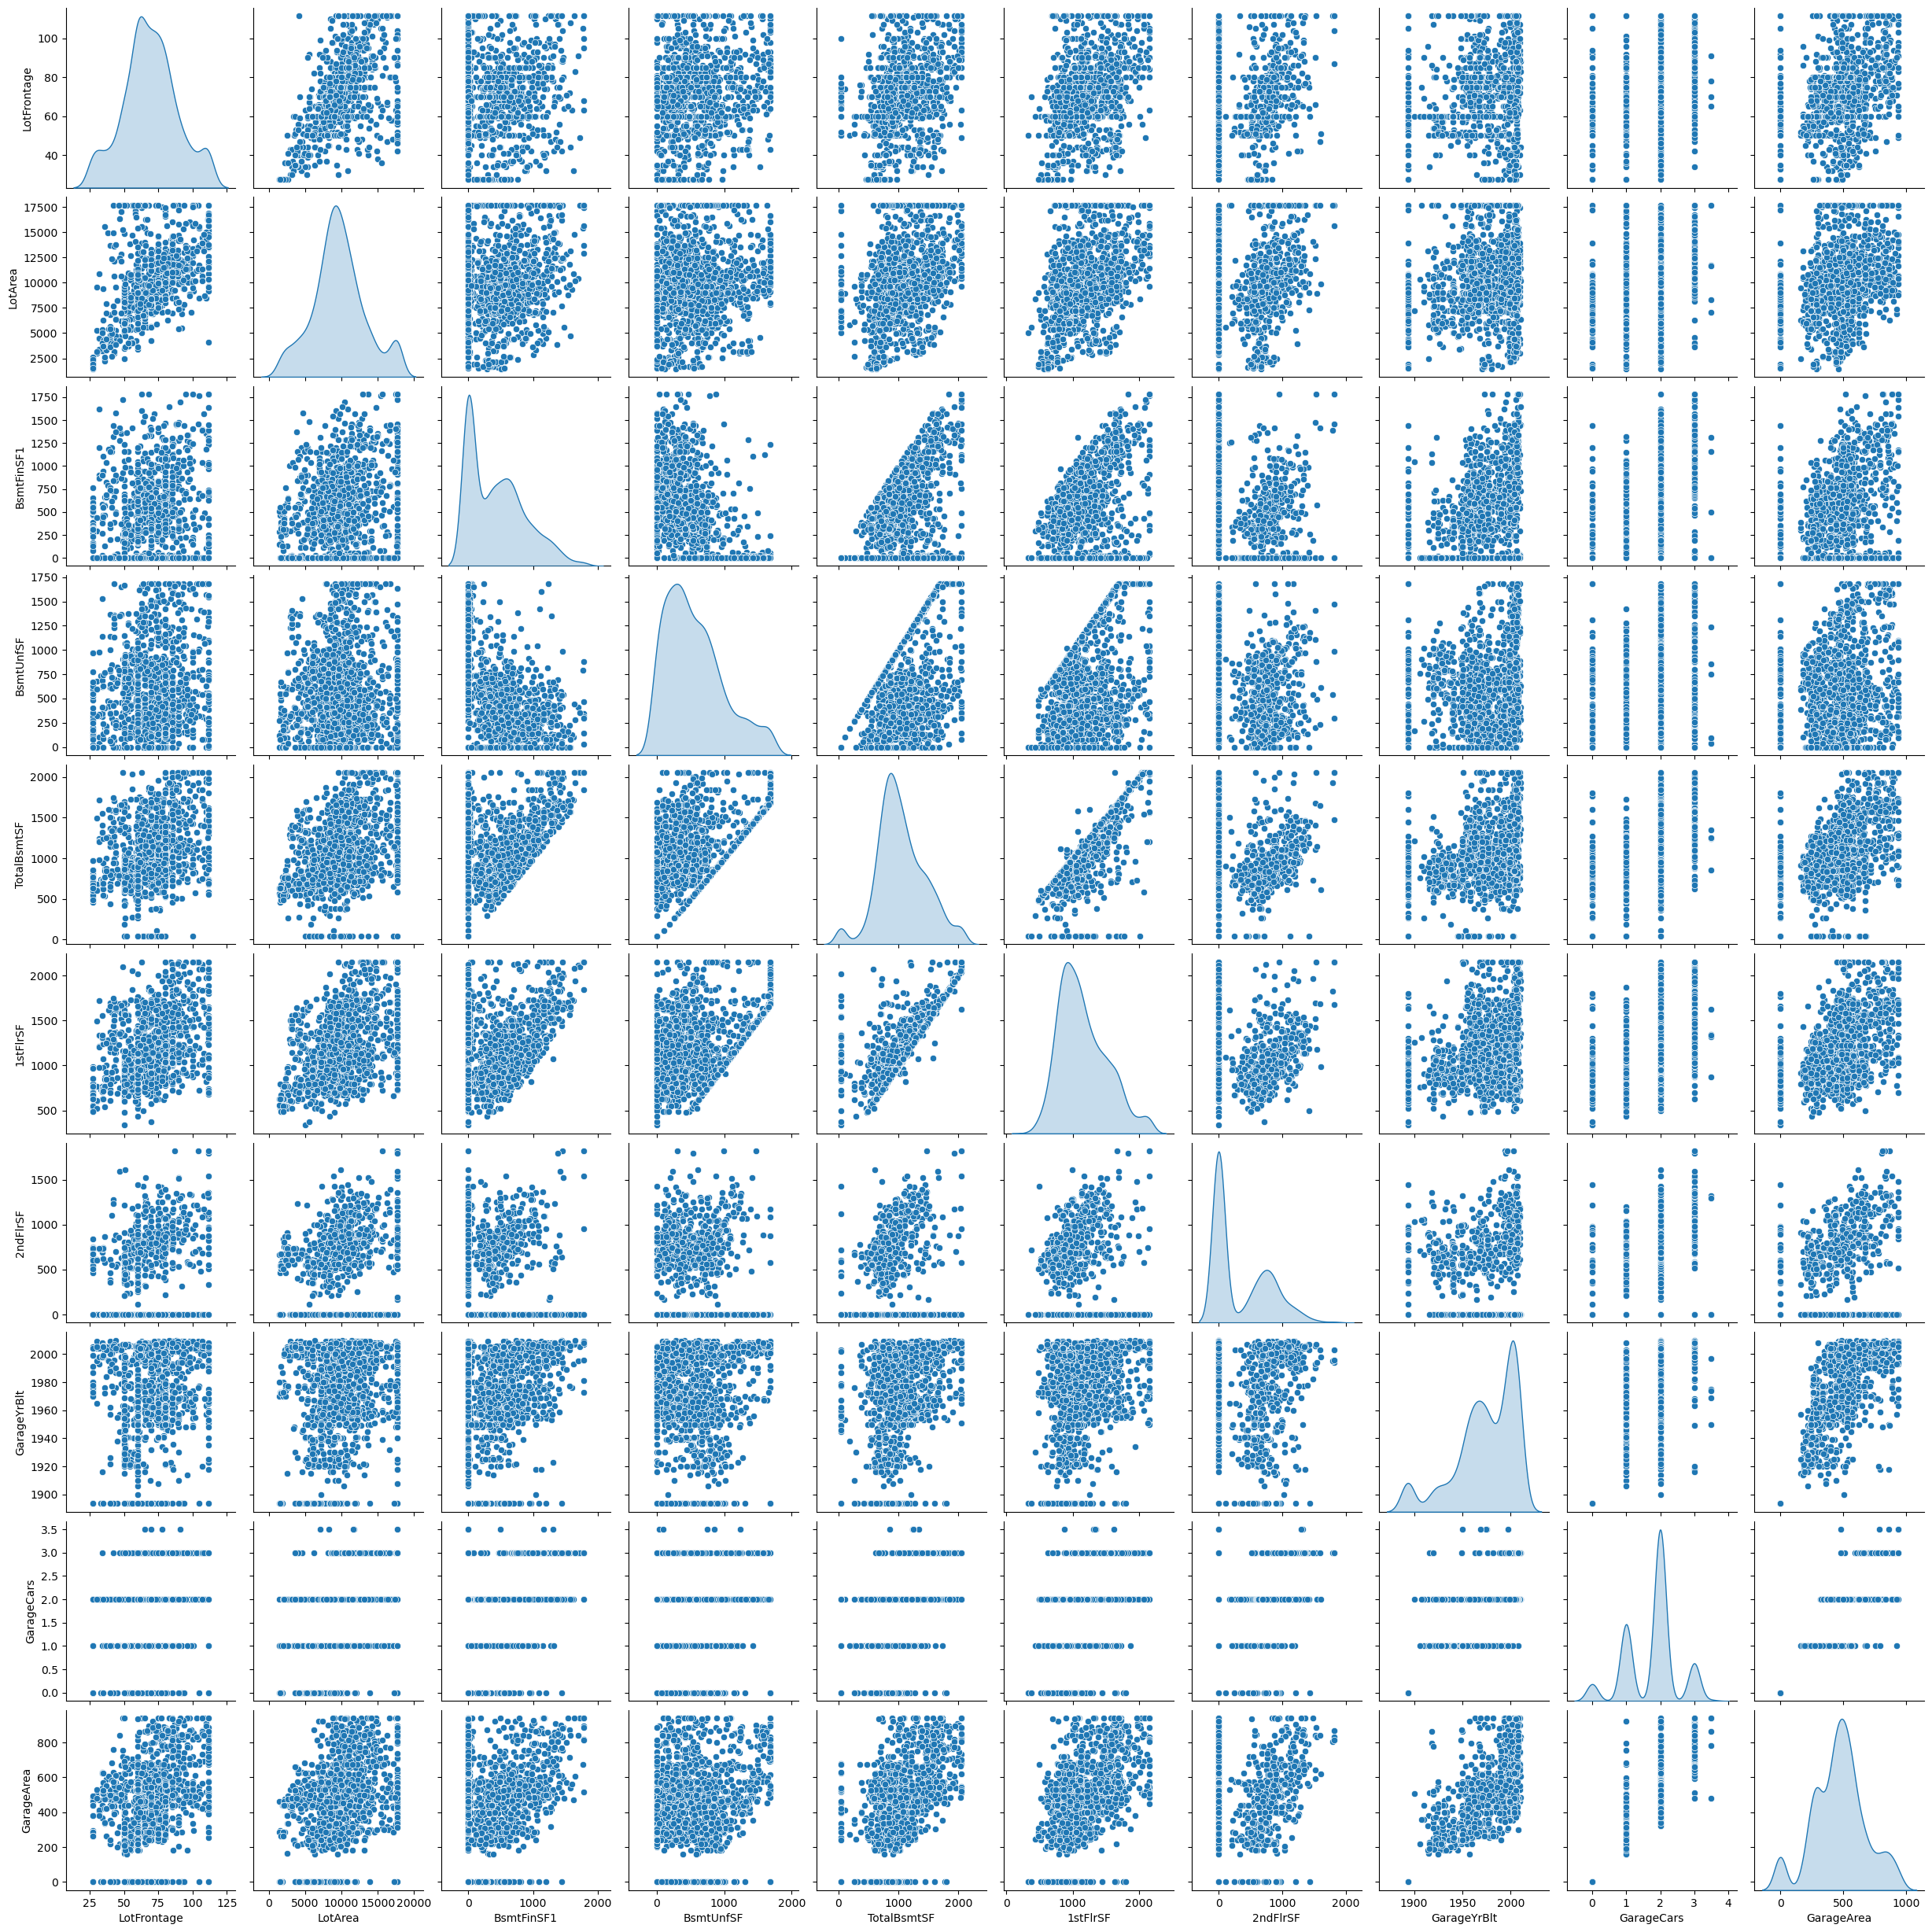

In [110]:
# Drawing pairplot for some important columns

plt.figure(figsize=(24,12))
sns.color_palette("mako", as_cmap=True)
sns.pairplot(data = srps_hsng_df, vars=continuous_value_cols, 
             diag_kind = 'kde')

plt.show()

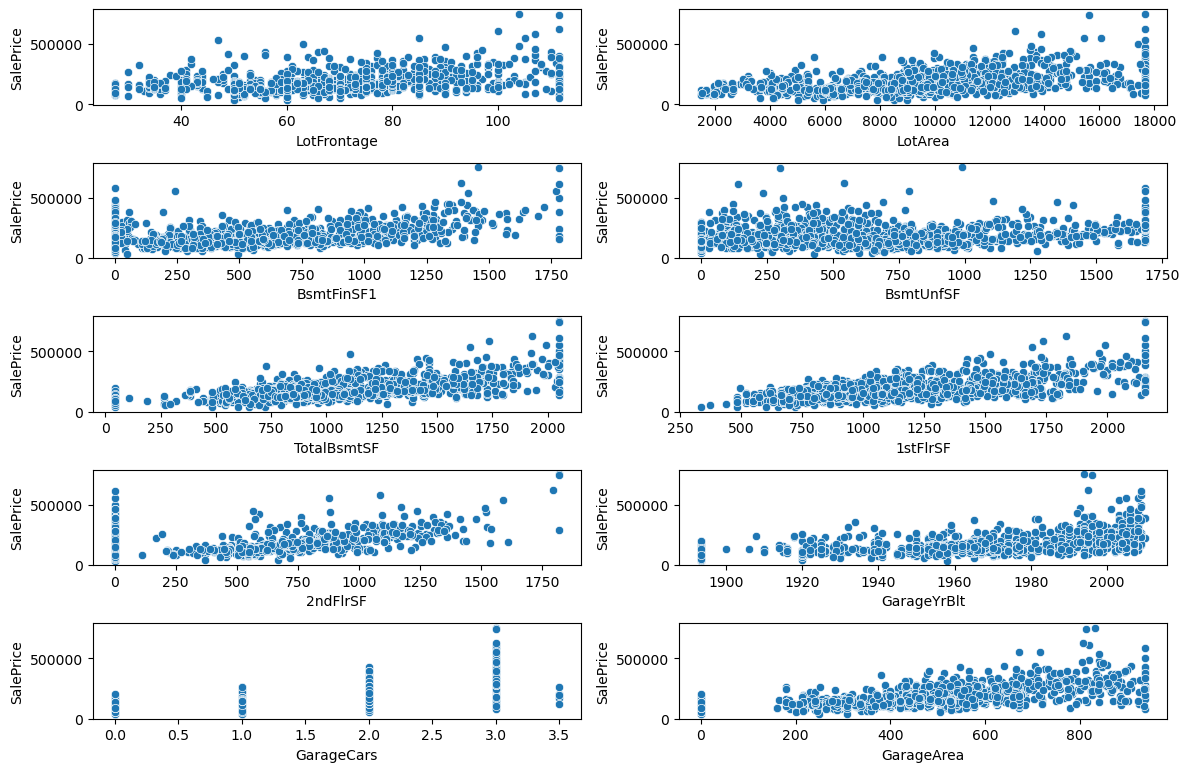

In [133]:
# Drawing scatter plots

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(continuous_value_cols):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=srps_hsng_df[feature], y=srps_hsng_df['SalePrice'])
    plt.tight_layout()

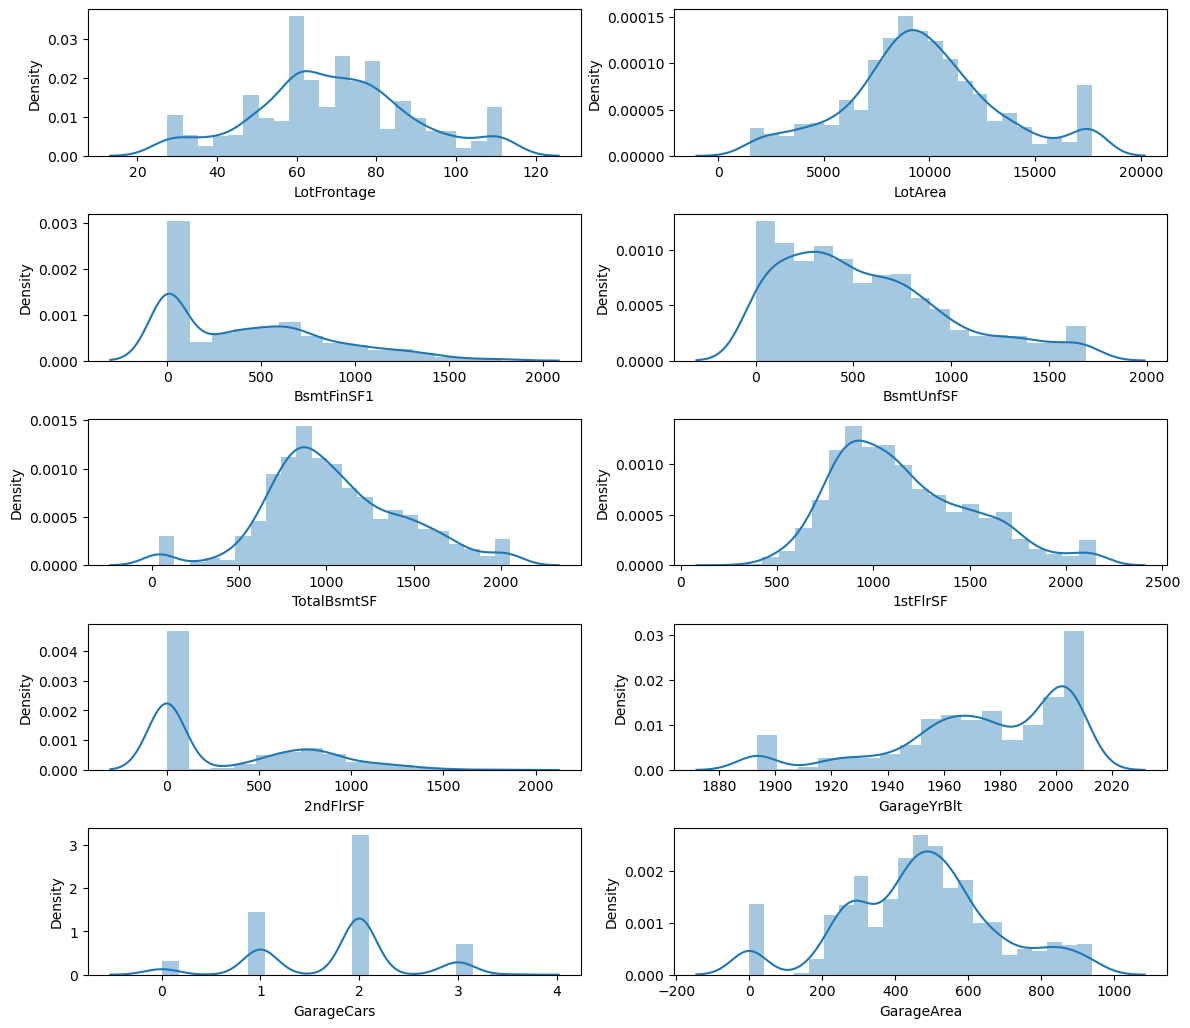

In [135]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(continuous_value_cols):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(srps_hsng_df[feature])
    plt.tight_layout()

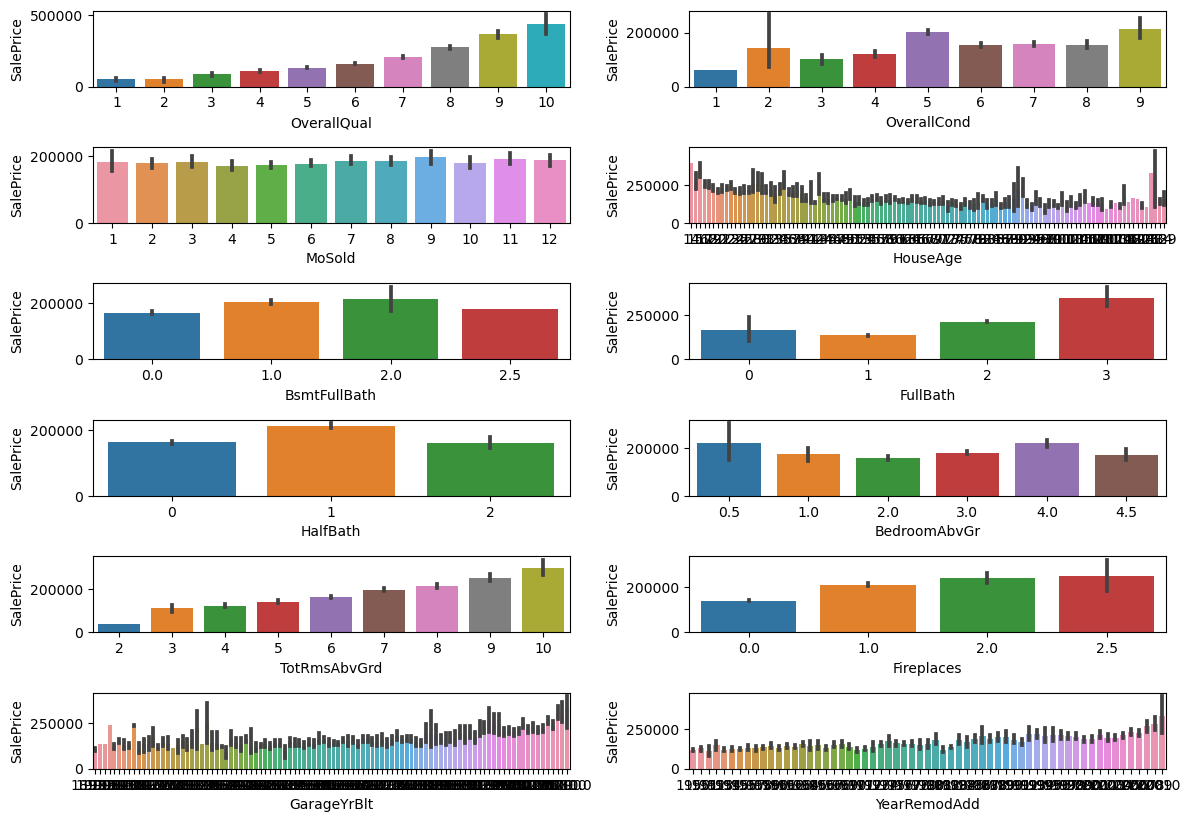

In [143]:
non_continuous_cols = ['OverallQual','OverallCond','MoSold','HouseAge','BsmtFullBath',
                       'FullBath','HalfBath','BedroomAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearRemodAdd']
fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(non_continuous_cols):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=srps_hsng_df[col], y=srps_hsng_df['SalePrice'])
    plt.tight_layout()

# Analyzing Categorical columns

In [155]:
def drawCategoryColsPlot(feature_list):
    fig=plt.subplots(figsize=(24, 24))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        sns.boxplot(y=srps_hsng_df['SalePrice'], x=srps_hsng_df[feature])
        plt.tight_layout()

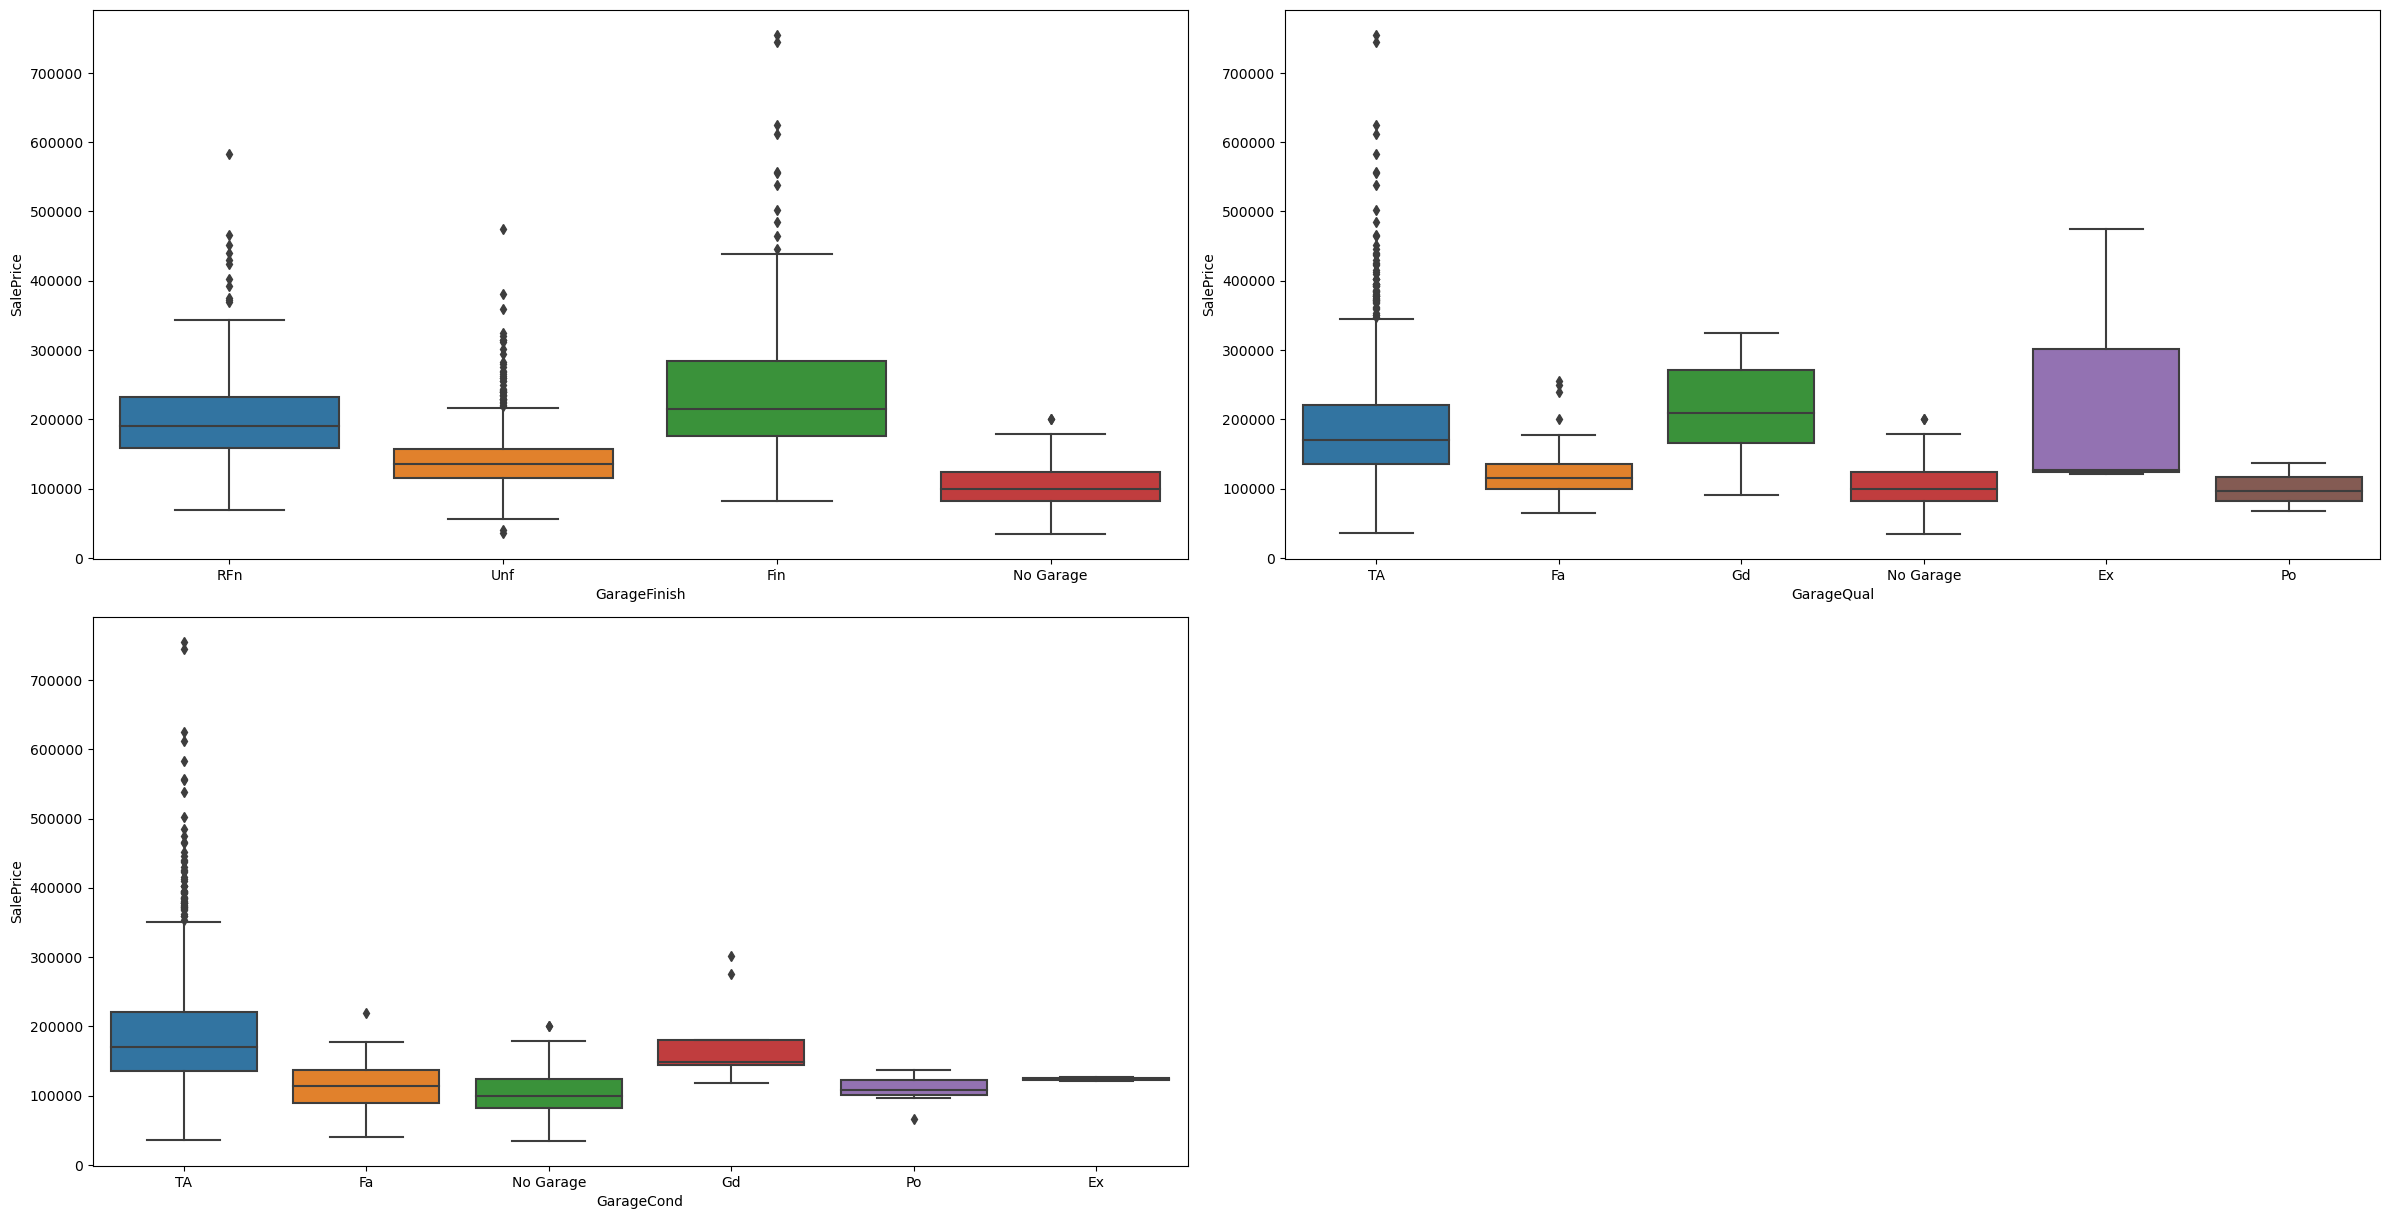

In [156]:
# Drawing Garage features vs SalePrice plots

drawCategoryColsPlot(['GarageFinish', 'GarageQual','GarageCond'])

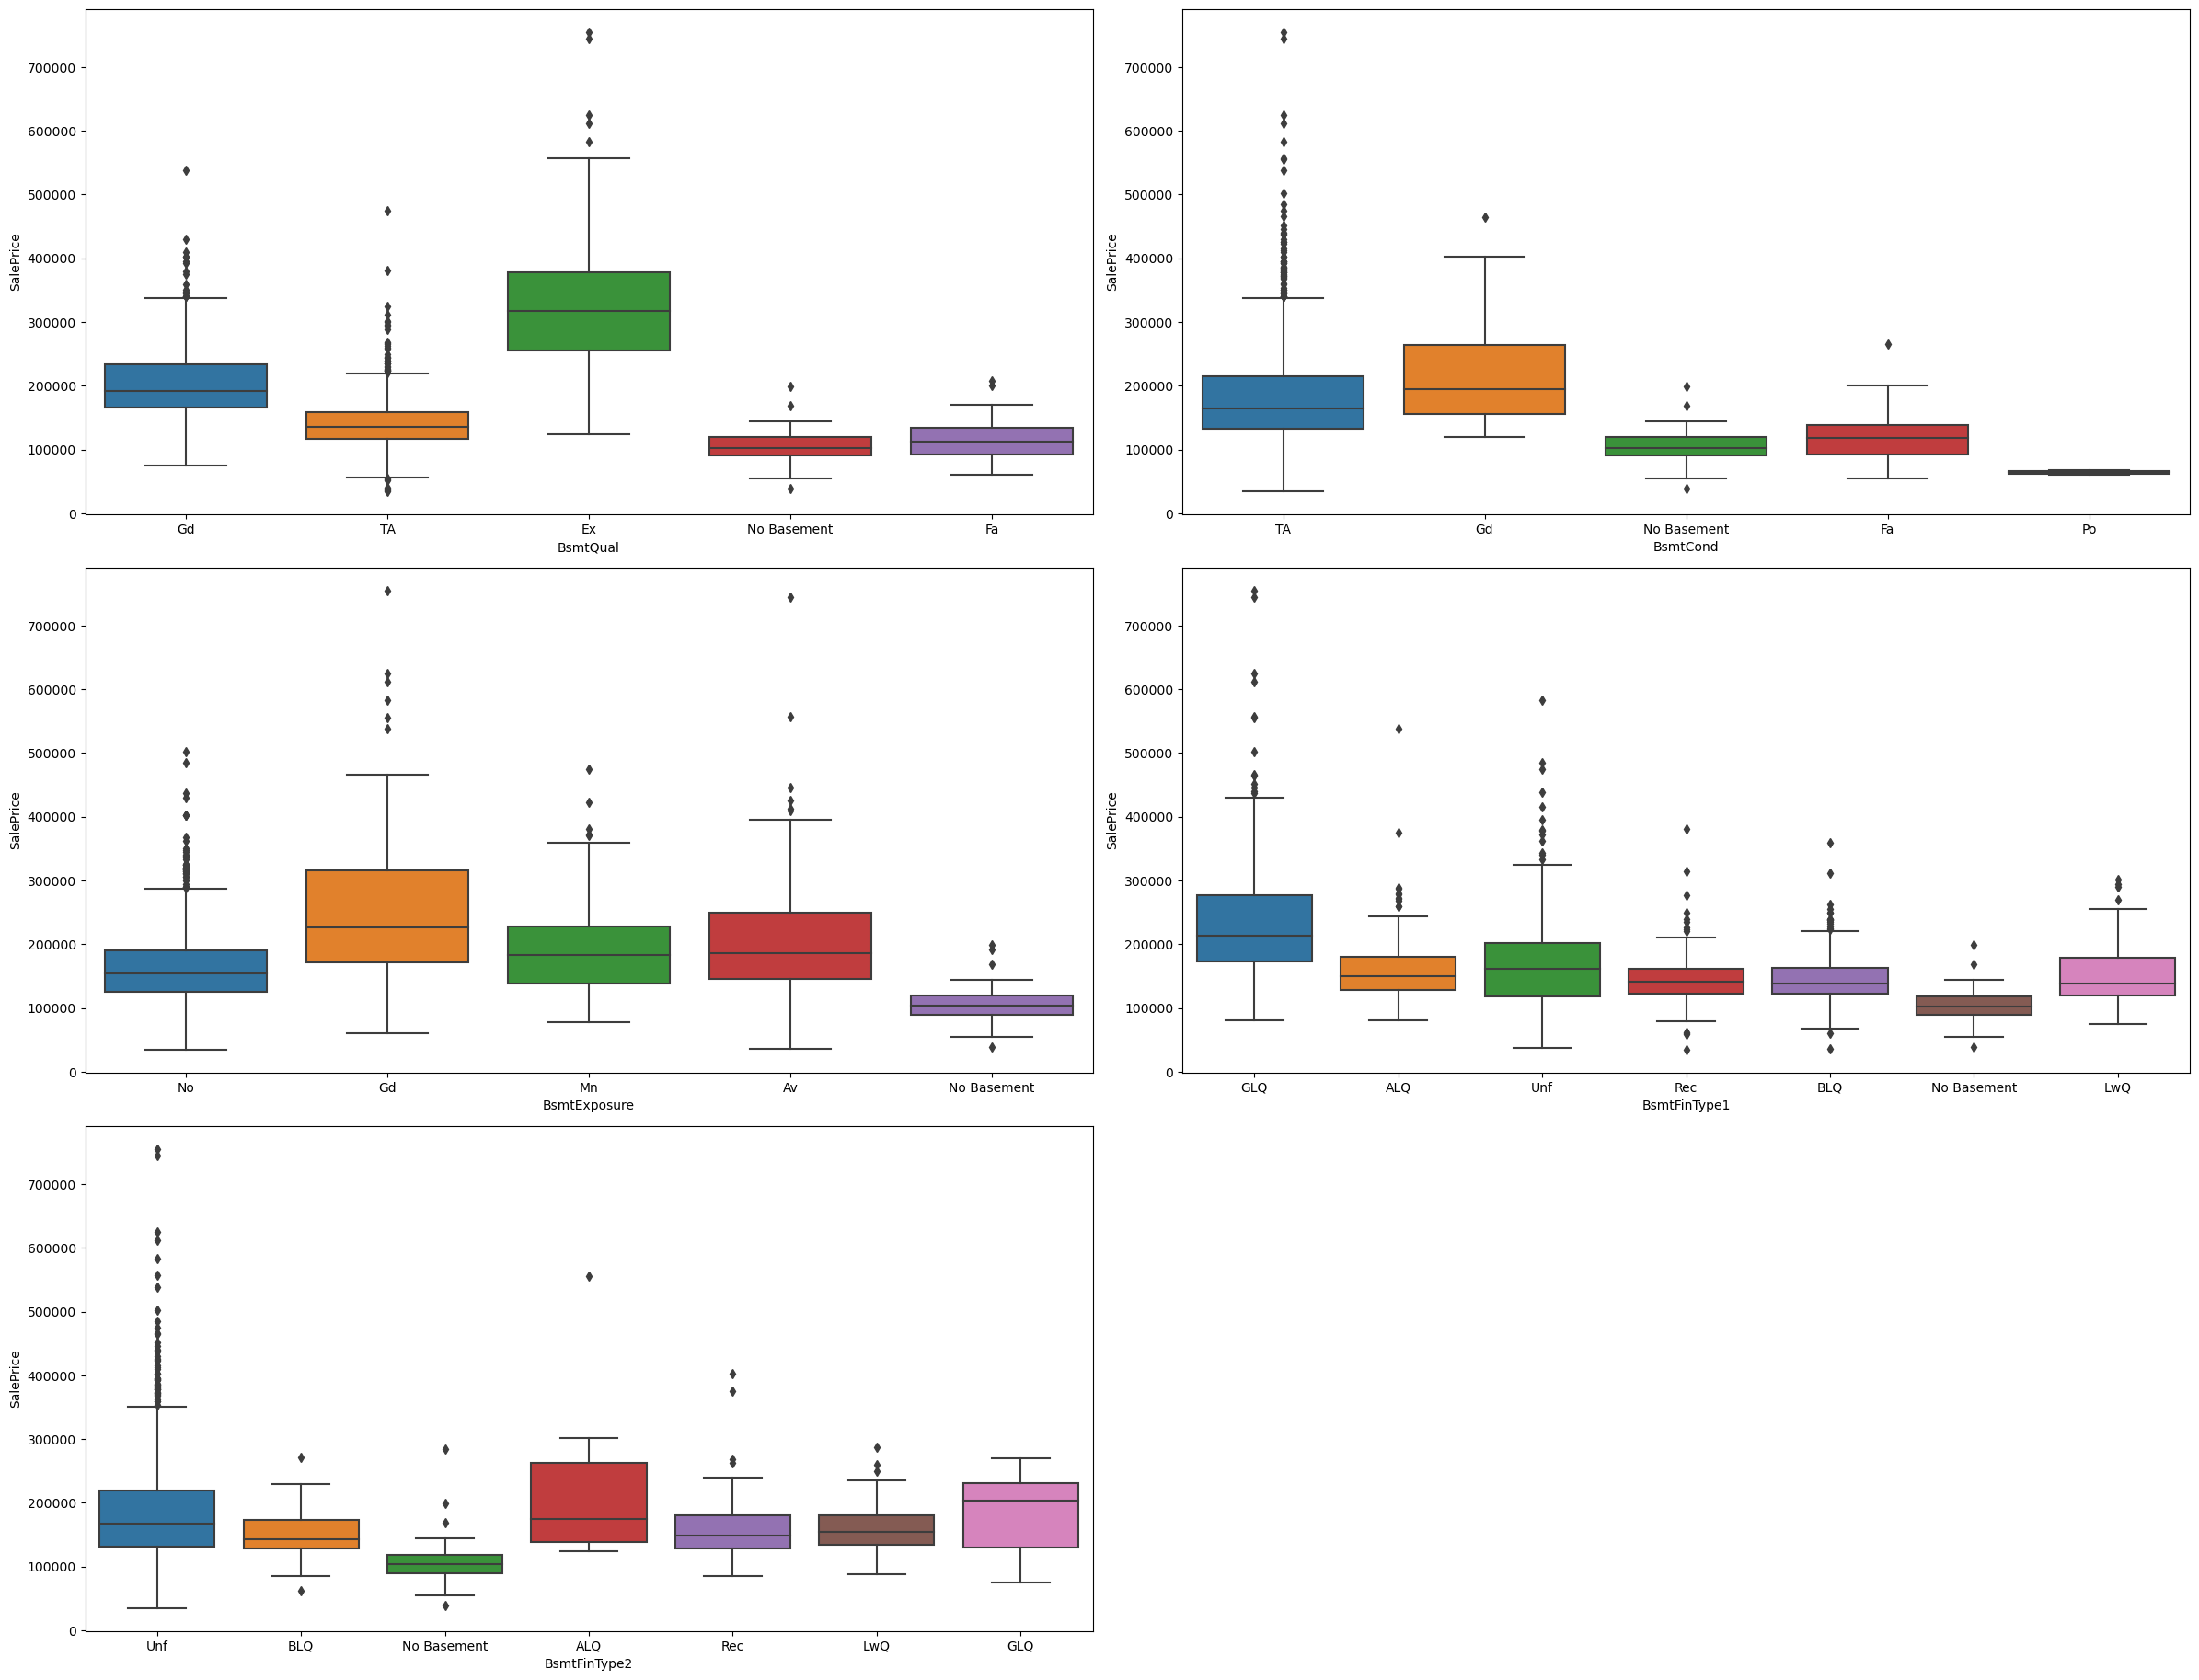

In [157]:
# Drawing basement features vs SalePrice plots

drawCategoryColsPlot(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])



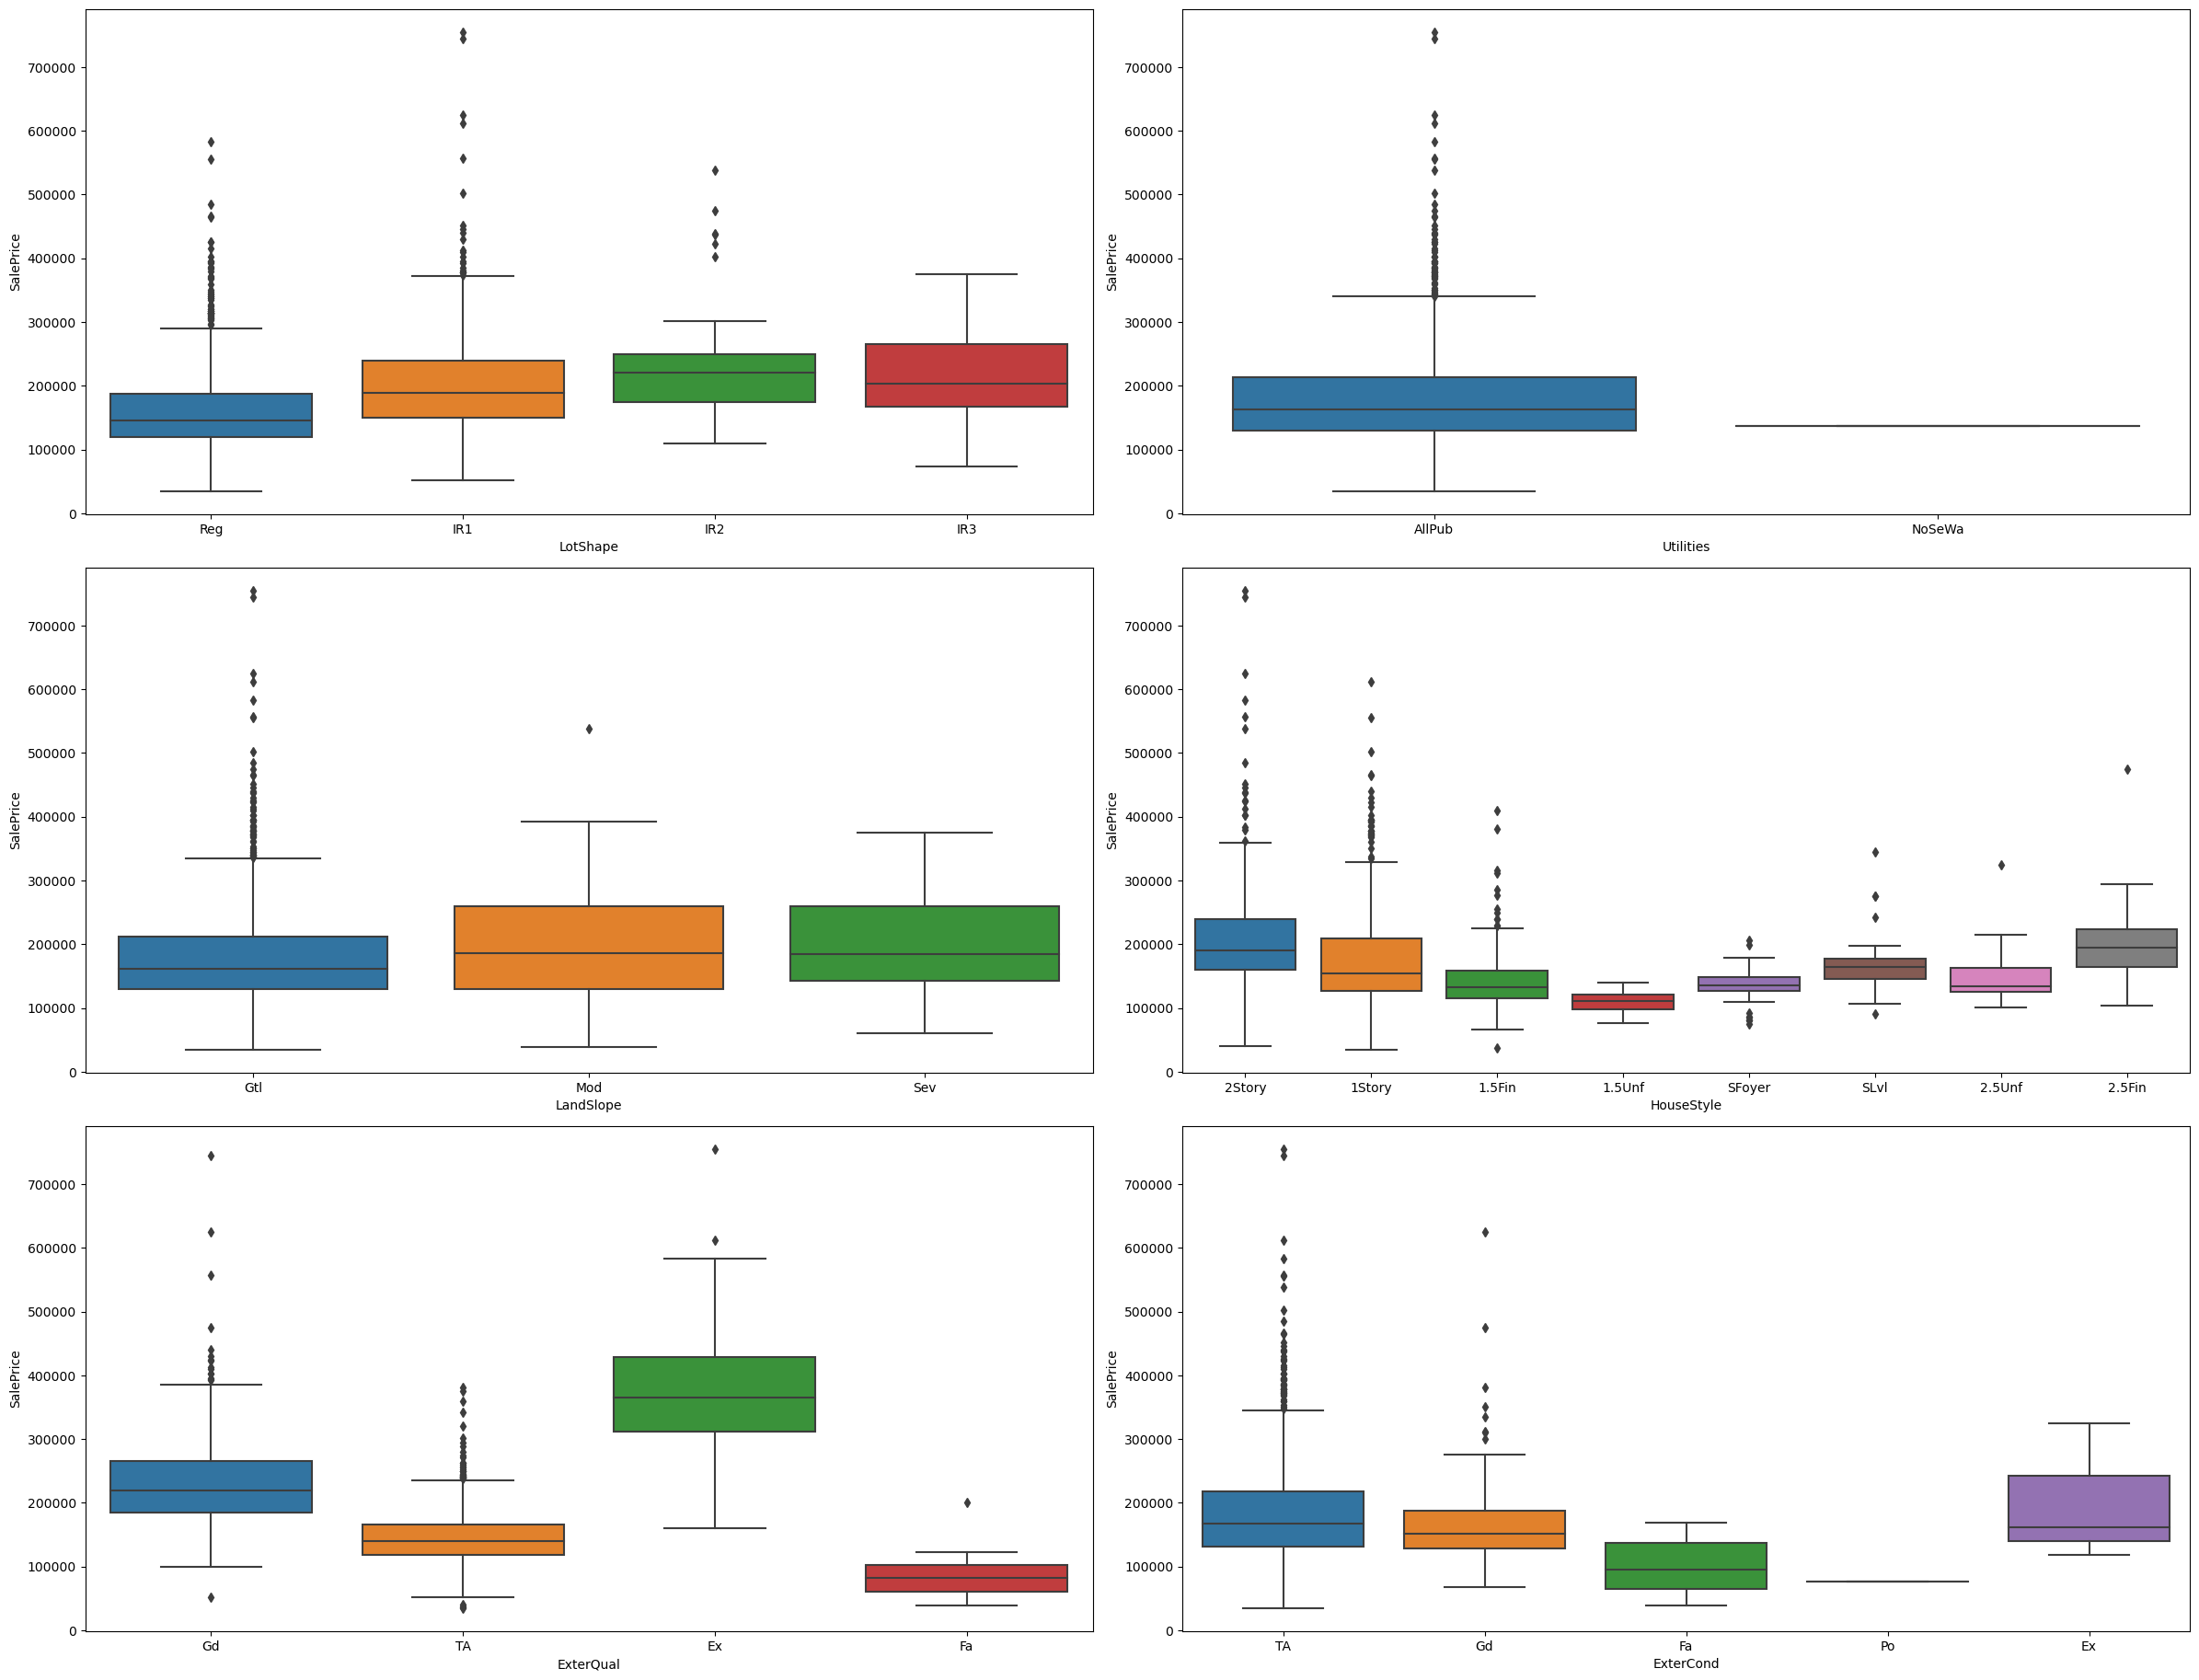

In [158]:
# Drawing exterior features vs SalePrice plots

drawCategoryColsPlot(['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond'])

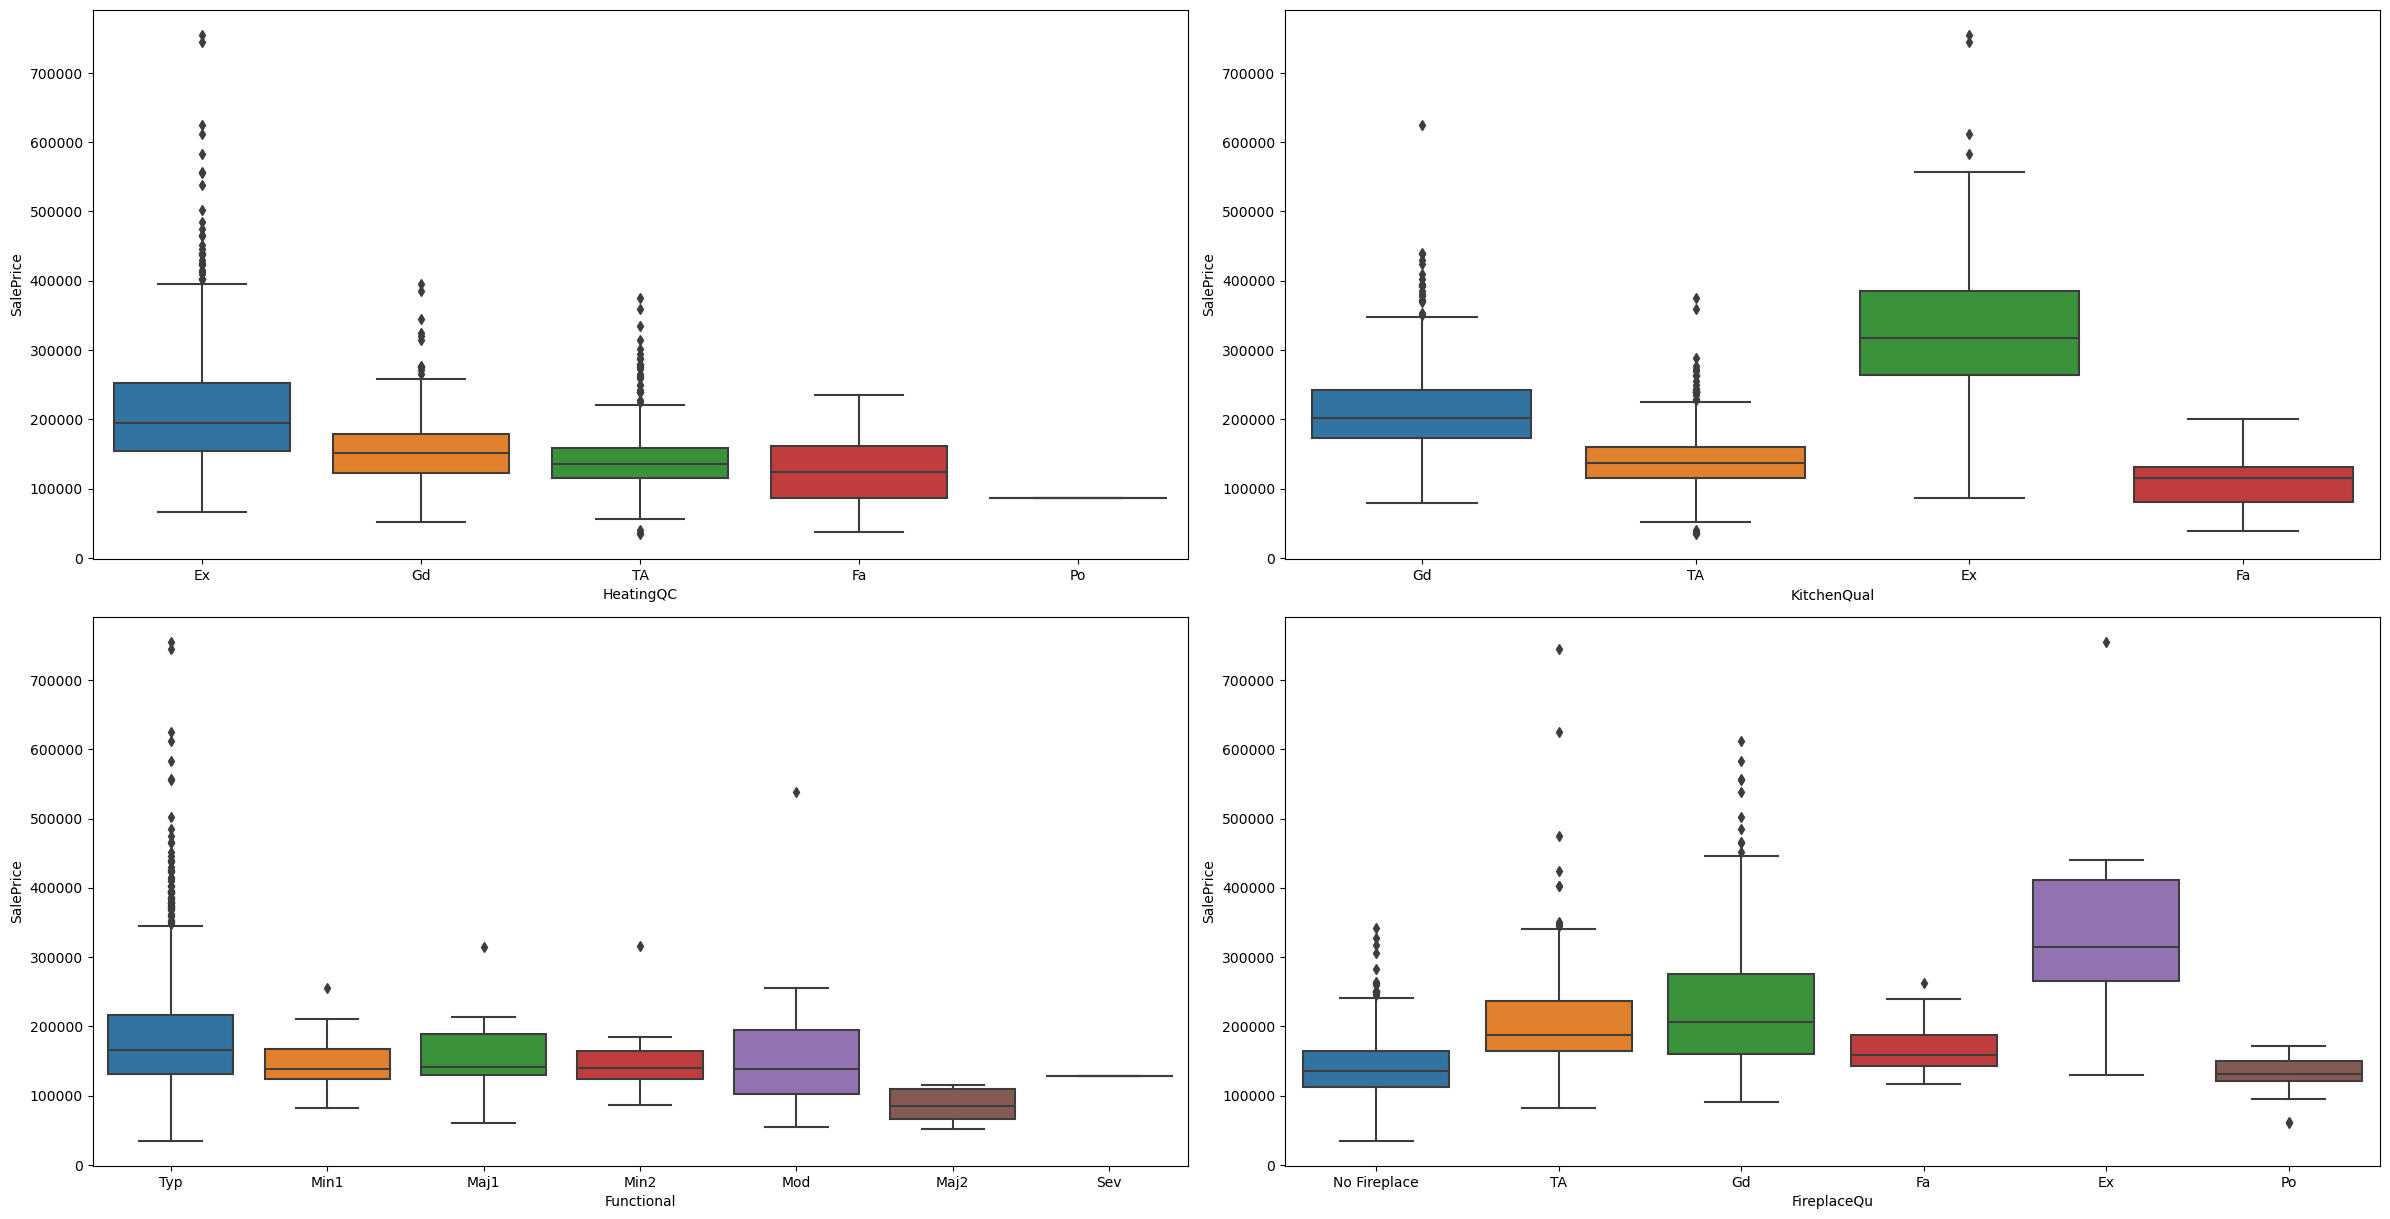

In [159]:
# Drawing interior features vs SalePrice plots

drawCategoryColsPlot(['HeatingQC', 'KitchenQual','Functional','FireplaceQu'])